ML Assignment 3

It is claimed that when data has skew or outliers, the robust normalisation performs better than z-scaling( also called as standard scaling). Your task is to prove or disprove this claim.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
np.random.seed(0)

In [3]:
n =1000;
data = np.random.normal(10, 8, n)


In [4]:
data = np.exp(data/5) 
#e^x => data^5 (5 is random value), not much change but push the larger values more apart and closess the smaller values
data


array([1.24273372e+02, 1.40167288e+01, 3.53741304e+01, 2.66514625e+02,
       1.46656451e+02, 1.54705851e+00, 3.37892082e+01, 5.79982919e+00,
       6.26419343e+00, 1.42528602e+01, 9.30423538e+00, 7.57045006e+01,
       2.49696318e+01, 8.97712815e+00, 1.50319987e+01, 1.26022948e+01,
       8.06828887e+01, 5.32145508e+00, 1.21935646e+01, 1.88409353e+00,
       1.24334010e-01, 2.10266305e+01, 2.94619004e+01, 2.25361584e+00,
       2.79110399e+02, 7.21094502e-01, 7.95033151e+00, 5.47671703e+00,
       8.58367076e+01, 7.75539662e+01, 9.46798286e+00, 1.35320376e+01,
       1.78522205e+00, 3.10592241e-01, 4.23481889e+00, 9.48923834e+00,
       5.29032667e+01, 5.05927233e+01, 3.97600319e+00, 4.55541028e+00,
       1.38031986e+00, 7.61832397e-01, 4.81893422e-01, 1.67543100e+02,
       3.26923662e+00, 3.66592656e+00, 9.95537411e-01, 2.56356656e+01,
       5.58647522e-01, 5.25728930e+00, 1.76341717e+00, 1.37225985e+01,
       3.26321133e+00, 1.11738206e+00, 7.06327224e+00, 1.46630539e+01,
      

In [5]:
extra_outliner = np.array([100,150,200])
data = np.concatenate((data, extra_outliner))
print(data)


[124.2733722   14.01672884  35.37413044 ... 100.         150.
 200.        ]


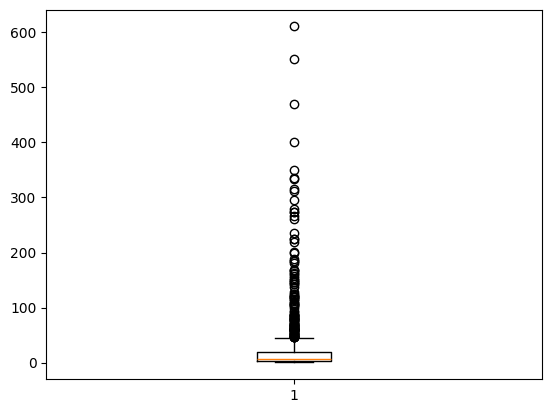

In [6]:
plt.boxplot(data)
plt.show()

Z-Scaling

In [7]:
mean = np.mean(data)
sd = np.std(data)

In [8]:
z  = (data - mean) / sd

In [9]:
print(z)

[ 1.86673454 -0.18032921  0.21619984 ...  1.41606654  2.34438419
  3.27270183]


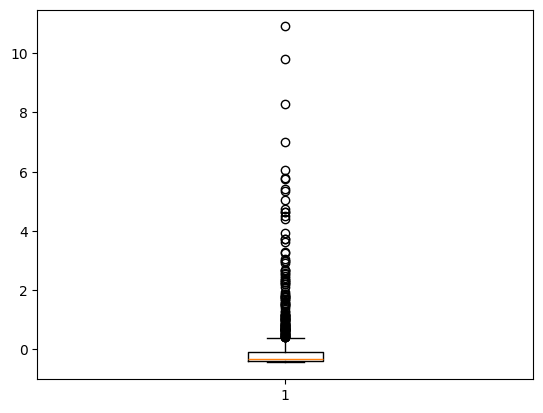

In [10]:
plt.boxplot(z)
plt.show()

Robust Scaling

In [11]:
median = np.median(data)
q1 = np.percentile(data, 25) #1st quartile
q2 = np.percentile(data, 75) #2nd quartile

iqr = q2-q1

In [12]:
robust = (data - median) / iqr

In [13]:
print(robust)

[ 6.82578366  0.42181604  1.66230463 ...  5.41592857  8.32004729
 11.224166  ]


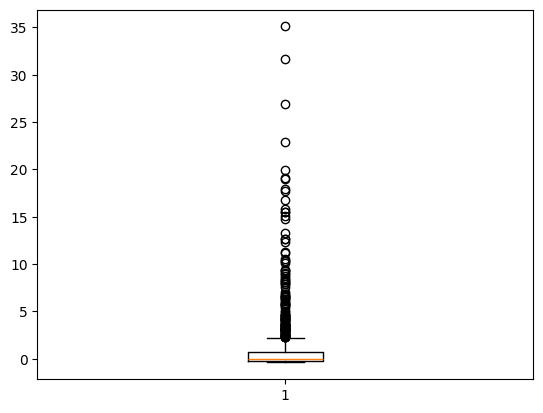

In [14]:
plt.boxplot(robust)
plt.show()

Comapring Z-score and Robust Normalization

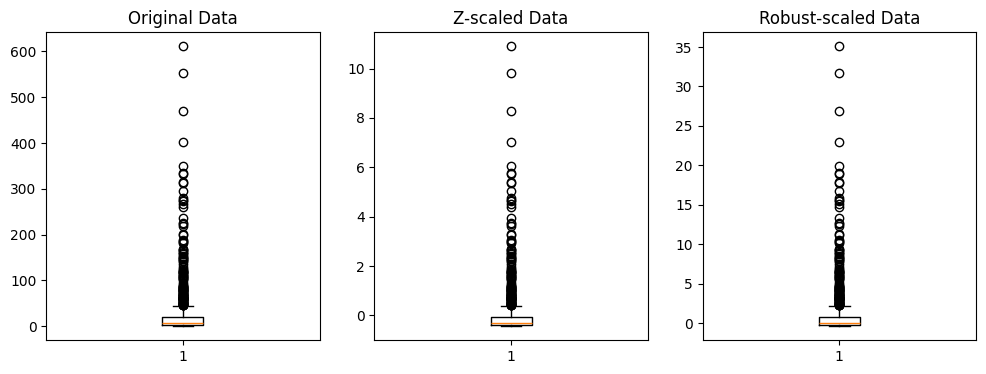

In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.boxplot(data)
plt.title("Original Data")

plt.subplot(1, 3, 2)
plt.boxplot(z)
plt.title("Z-scaled Data")

plt.subplot(1, 3, 3)
plt.boxplot(robust)
plt.title("Robust-scaled Data")

plt.show()

Geting them in Smae Scale

In [16]:
z_norm = ( z - np.min(z) ) / ( np.max(z) - np.min(z) )
robust_norm = ( robust - np.min(robust) ) / ( np.max(robust) - np.min(robust) )

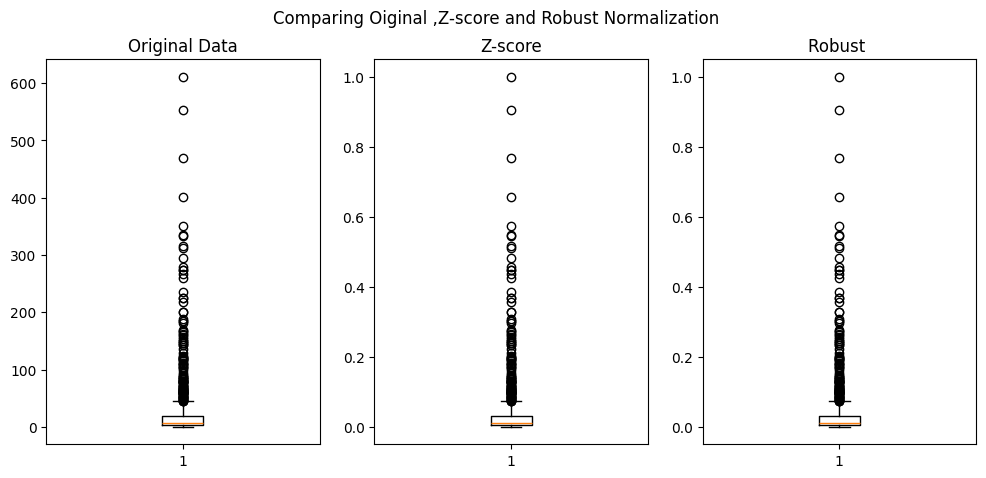

In [17]:
plt.figure(figsize=(12,5))
plt.suptitle("Comparing Oiginal ,Z-score and Robust Normalization")

plt.subplot(1, 3, 1)
plt.boxplot(data)
plt.title("Original Data")

plt.subplot(1, 3, 2)
plt.boxplot(z_norm)
plt.title("Z-score")

plt.subplot(1, 3, 3)
plt.boxplot(robust_norm)
plt.title("Robust ")

plt.show()